In [1]:
#Install tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
#Other imports
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

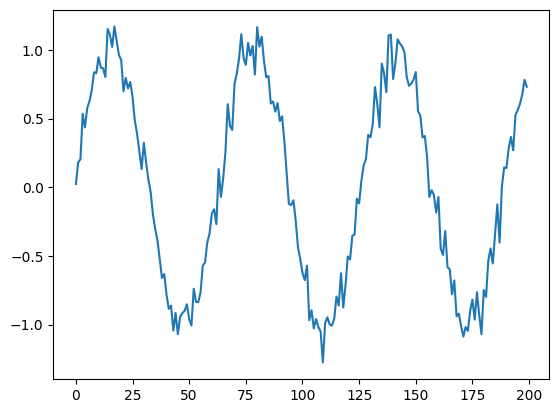

In [4]:
#Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [5]:
#Build the dataset
#let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [22]:
#Try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [23]:
#Compile the model
model.compile(
     loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

In [24]:
#Fit data
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 765ms/step - loss: 0.4456 - val_loss: 0.0427
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0502 - val_loss: 0.0353
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0312 - val_loss: 0.0422
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0296 - val_loss: 0.0351
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0291 - val_loss: 0.0418
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0277 - val_loss: 0.0374
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0211 - val_loss: 0.0328
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0263 - val_loss: 0.0315
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0265 - val_loss: 0.0377
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0282 - val_loss: 0.0331
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0244 - val_loss: 0.0318
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0238 - val_loss: 0.0377


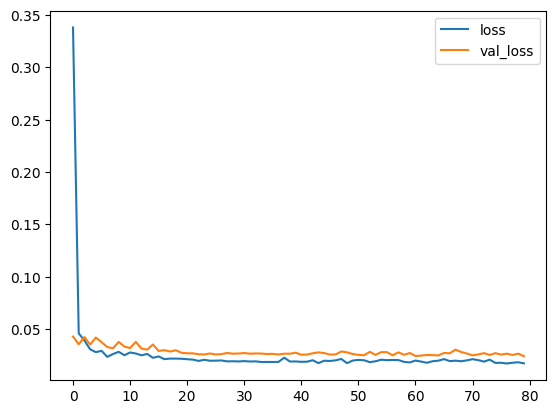

In [25]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [26]:
#Wrong forecast using true targets
# Assuming:
# - X is your input data with shape (num_samples, sequence_length, num_features)
# - Y is your target data with shape (num_samples,)
# - N is the total number of samples
# - model is your trained model

# Extract validation targets
validation_targets = Y[-N//2:]

# Initialize list to store validation predictions
validation_predictions = []

# Loop through the validation data
i = -N//2
while len(validation_predictions) < len(validation_targets):
    # Ensure X[i] has the correct shape before reshaping
    if X[i].shape[-1] != 1:
        raise ValueError(f"Expected X[i] to have shape (sequence_length, 1), but got {X[i].shape}")

    # Reshape the input to match the model's expected input shape
    input_data = X[i].reshape(1, X[i].shape[0], 1)  # Shape: (1, sequence_length, 1)

    # Generate prediction
    p = model.predict(input_data, verbose=0)[0, 0]  # Assuming the model outputs a single value

    # Append the prediction to the list
    validation_predictions.append(p)

    # Move to the next sample
    i += 1

# Now validation_predictions contains the model's predictions for the validation set

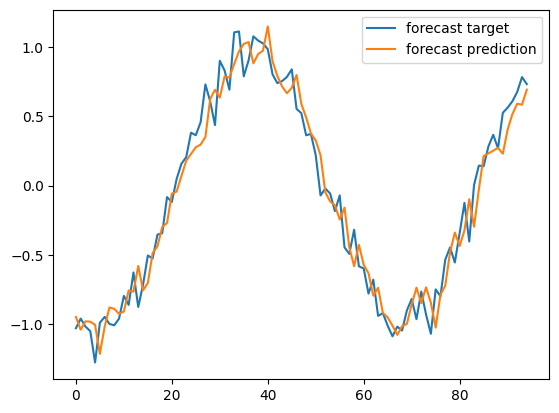

In [27]:
plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [28]:
# Forecast future values
validation_targets = Y[-N//2:]
validation_predictions = []

# Initialize the last input
last_x = X[-N//2] # Use a copy of the last input to avoid modifying the original data

# Iterate to generate predictions
while len(validation_predictions) < len(validation_targets):
    # Predict the next value
    p = model.predict(last_x.reshape(1, last_x.shape[0], 1))[0, 0]

    # Append the prediction to the list
    validation_predictions.append(p)

    # Update the input for the next prediction
    last_x = np.roll(last_x, -1)  # Shift the input to the left
    last_x[-1] = p  # Replace the last value with the new prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

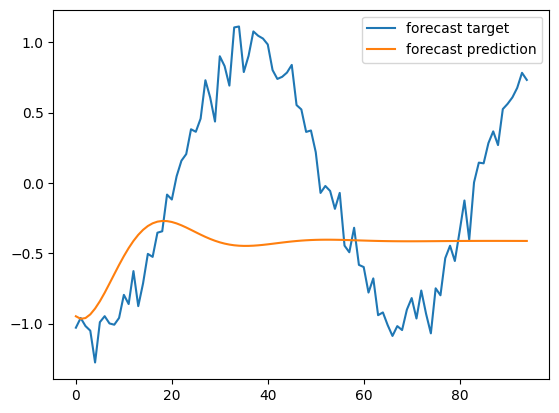

In [29]:
plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()